In [7]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import pandas as pd
import webcolors as wc
from bs4 import BeautifulSoup
import requests
#Se quiere comprobar esto:
#https://www.reddit.com/r/dataisbeautiful/comments/8rfnc0/average_flag_colour_by_latitude_oc/

In [42]:
def get_codes():
    url = "https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2"
    r = requests.get(url)
    soup = BeautifulSoup(r.content)
    tabla = soup.find('table',{'class':'wikitable sortable'})
    filas_tabla = tabla.find_all('tr')

    codigos = []
    nombres = []
    for tr in filas_tabla:
        try:
            td = tr.find_all('td')
            row = [tr.text for tr in td]
            codigo = row[0]
            nombre = row[1]
            codigos.append(codigo)
            nombres.append(nombre)
        except:
            pass

    codes_df = pd.DataFrame({"codigo":codigos, "nombre":nombres})
    return codes_df

    #https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in wc.css3_hex_to_names.items():
        r_c, g_c, b_c = wc.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = wc.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

def get_flags():
    #https://countryflags.io/
    df_codes = get_codes()
    codes = list(df_codes.codigo)
    df_flags = pd.DataFrame(columns=["color", "aux_delete"])
    for code in codes:
        url = "https://www.countryflags.io/" + code + "/flat/64.png"
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img_np =np.array(img)
        a = img_np.reshape((4096, 4))

        df = pd.DataFrame(a)
        df.columns = ["R" ,"G", "B", "a"]
        df = df.astype(int)
        df = df.groupby(df.columns.tolist()).size().reset_index().rename(columns={0:code})

        df['color'] = df.apply(lambda row: get_colour_name((row.R, row.G, row.B))[1], axis=1)

        df = df.loc[:,[code, "color"]]
        df = df.groupby("color").sum()
        df = df.reset_index()
        df_flags = df_flags.merge(df, how='outer', left_on='color', right_on='color')
        print(code)
    df_flags = df_flags.drop(["aux_delete"], axis=1)  
    df_flags = df_flags.fillna(0)
    return df_flags


In [43]:
df_flags = get_flags()

AD
AE
AF
AG
AI
AL
AM
AO
AQ
AR
AS
AT
AU
AW
AX
AZ
BA
BB
BD
BE
BF
BG
BH
BI
BJ
BL
BM
BN
BO
BQ
BR
BS
BT
BV
BW
BY
BZ
CA
CC
CD
CF
CG
CH
CI
CK
CL
CM
CN
CO
CR
CU
CV
CW
CX
CY
CZ
DE
DJ
DK
DM
DO
DZ
EC
EE
EG
EH
ER
ES
ET
FI
FJ
FK
FM
FO
FR
GA
GB
GD
GE
GF
GG
GH
GI
GL
GM
GN
GP
GQ
GR
GS
GT
GU
GW
GY
HK
HM
HN
HR
HT
HU
ID
IE
IL
IM
IN
IO
IQ
IR
IS
IT
JE
JM
JO
JP
KE
KG
KH
KI
KM
KN
KP
KR
KW
KY
KZ
LA
LB
LC
LI
LK
LR
LS
LT
LU
LV
LY
MA
MC
MD
ME
MF
MG
MH
MK
ML
MM
MN
MO
MP
MQ
MR
MS
MT
MU
MV
MW
MX
MY
MZ
NA
NC
NE
NF
NG
NI
NL
NO
NP
NR
NU
NZ
OM
PA
PE
PF
PG
PH
PK
PL
PM
PN
PR
PS
PT
PW
PY
QA
RE
RO
RS
RU
RW
SA
SB
SC
SD
SE
SG
SH
SI
SJ
SK
SL
SM
SN
SO
SR
SS
ST
SV
SX
SY
SZ
TC
TD
TF
TG
TH
TJ
TK
TL
TM
TN
TO
TR
TT
TV
TW
TZ
UA
UG
UM
US
UY
UZ
VA
VC
VE
VG
VI
VN
VU
WF
WS
YE
YT
ZA
ZM
ZW


In [45]:
df_flags['sum'] = df_flags.drop('color', axis=1).sum(axis=1)
display(df_flags)

,color,AD,AE,AF,AG,AI,AL,AM,AO,AQ,...,VN,VU,WF,WS,YE,YT,ZA,ZM,ZW,sum
0,chocolate,23.0,0.0,3.0,0.0,19.0,0.0,0.0,19.0,0.0,...,16.0,0.0,0.0,0.0,0.0,6.0,0.0,33.0,5.0,1260.0
1,coral,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,865.0
2,crimson,802.0,640.0,10.0,1158.0,12.0,1885.0,0.0,1112.0,0.0,...,2208.0,744.0,1939.0,1800.0,780.0,0.0,465.0,208.0,474.0,107848.0
3,darkblue,800.0,0.0,0.0,0.0,1624.0,0.0,780.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,49.0,490.0,0.0,0.0,33052.0
4,darkkhaki,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,547.0
5,darkorange,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,0.0,2244.0
6,darksalmon,2.0,0.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,3.0,240.0
7,firebrick,2.0,0.0,597.0,18.0,36.0,100.0,0.0,28.0,0.0,...,10.0,8.0,0.0,0.0,0.0,52.0,0.0,0.0,13.0,18234.0
8,gold,524.0,0.0,0.0,86.0,0.0,0.0,0.0,41.0,0.0,...,126.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,494.0,40599.0
9,goldenrod,60.0,0.0,0.0,24.0,0.0,0.0,0.0,29.0,0.0,...,34.0,24.0,0.0,0.0,0.0,0.0,26.0,0.0,66.0,3370.0


In [60]:
colores = list(df_flags.color)
r = []
g = []
b = []
for color in colores:
    rgb = wc.name_to_rgb(color)
    r.append(rgb[0])
    g.append(rgb[1])
    b.append(rgb[2])

df_flags["r"] = r
df_flags["g"] = g
df_flags["b"] = b

display(df_flags.head())
    

,color,AD,AE,AF,AG,AI,AL,AM,AO,AQ,...,WS,YE,YT,ZA,ZM,ZW,sum,r,g,b
0,chocolate,23.0,0.0,3.0,0.0,19.0,0.0,0.0,19.0,0.0,...,0.0,0.0,6.0,0.0,33.0,5.0,1260.0,210,105,30
1,coral,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,865.0,255,127,80
2,crimson,802.0,640.0,10.0,1158.0,12.0,1885.0,0.0,1112.0,0.0,...,1800.0,780.0,0.0,465.0,208.0,474.0,107848.0,220,20,60
3,darkblue,800.0,0.0,0.0,0.0,1624.0,0.0,780.0,0.0,0.0,...,0.0,0.0,49.0,490.0,0.0,0.0,33052.0,0,0,139
4,darkkhaki,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,547.0,189,183,107


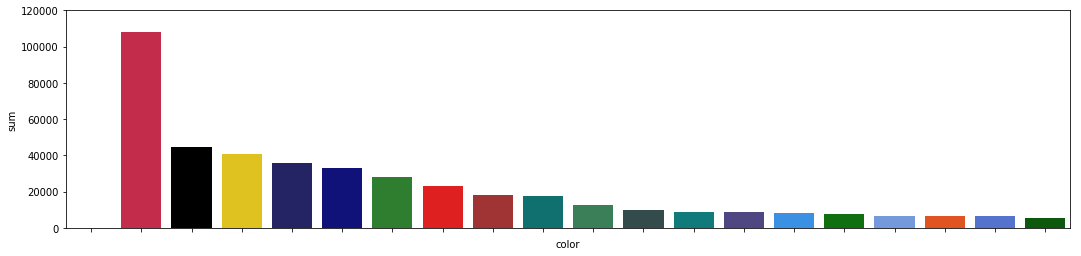

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sumas = list(df_flags["sum"])
colores = list(df_flags["color"])

df_colors = df_flags.loc[:, ["color", "r", "g", "b"]].copy()
df_colors.loc[:,["r","g","b"]] = df_colors.loc[:,["r","g","b"]]/255
dict_colors = df_colors.set_index('color').T.apply(tuple).to_dict()

fig, ax = plt.subplots(figsize=(18,4))
plt.ylim(0, 120000)
df_flags = df_flags.sort_values(by="sum", ascending=False)
df_flags_limited = df_flags.head(20).copy()
sns.barplot(ax=ax, x = "color", y = "sum", data = df_flags_limited, palette=dict_colors)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticklabels([])
plt.show()